In [ ]:
import pandas as pd
import numpy as np

# Load the Titanic dataset
data = pd.read_csv("/content/drive/MyDrive/Dataset/Titanic-Dataset.csv")

# Drop all categorical columns except 'Survived'
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.drop(columns=[col for col in categorical_columns if col != 'Survived'])

# Check for missing values (in percentage)
missing_info = data.isnull().sum() / len(data) * 100

# Handle missing values
for column in data.columns:
    if missing_info[column] > 10:  # If more than 10% missing
        data[column].fillna(data[column].mean(), inplace=True)
    else:  # If less than 10% missing
        data.dropna(subset=[column], inplace=True)

# Display cleaned data
print("Data after processing:\n", data.head())
print("\nMissing values after processing:\n", data.isnull().sum())


Data after processing:
    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

Missing values after processing:
 PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


/tmp/ipython-input-1630098203.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [ ]:
import numpy as np

# Separate features (X) and target (y)
X = data.drop(columns=['Survived']).values  # Convert features to NumPy array
y = data['Survived'].values                # Convert target to NumPy array

# Define a function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.

    Arguments:
    X : np.ndarray
        Feature matrix.
    y : np.ndarray
        Target array.
    test_size : float
        Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
        Seed for reproducibility.

    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
        Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (624, 6)
Shape of X_test: (267, 6)
Shape of y_train: (624,)
Shape of y_test: (267,)


In [ ]:
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Arguments:
    point1 : np.ndarray
        The first point as a numpy array.
    point2 : np.ndarray
        The second point as a numpy array.

    Returns:
    float
        The Euclidean distance between the two points.

    Raises:
    ValueError: If the input points do not have the same dimensionality.
    """
    # Check if the points are of the same dimension
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")

    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance


In [ ]:
import numpy as np

# Assuming the euclidean_distance function is already defined

# Test case for the function
try:
    # Define two points
    point1 = np.array([3, 4])
    point2 = np.array([0, 0])

    # Calculate the distance
    result = euclidean_distance(point1, point2)

    # Check if the result matches the expected value (sqrt(3^2 + 4^2) = 5)
    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Test passed successfully!


In [ ]:
import numpy as np

# Function for KNN prediction for a single query
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.

    Arguments:
    query : np.ndarray
        The query point for which the prediction is to be made.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    int
        The predicted class label for the query.
    """
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction


In [ ]:
import numpy as np

# Function to test KNN for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.

    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


In [ ]:
# Test case for KNN on the Titanic dataset
# Assume X_train, X_test, y_train, and y_test have been prepared using the code above
try:
    # Define the test set for the test case
    X_test_sample = X_test[:5]  # Taking a small subset for testing
    y_test_sample = y_test[:5]  # Corresponding labels for the subset

    # Make predictions
    predictions = knn_predict(X_test_sample, X_train, y_train, k=3)

    # Print test results
    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)

    # Check if predictions match expected format
    assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."

    print("Test case passed successfully!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Predictions: [0 1 0 0 0]
Actual labels: [1 0 0 1 1]
Test case passed successfully!


In [ ]:
import numpy as np

# Function to compute accuracy of predictions
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.

    Arguments:
    y_true : np.ndarray
        The true labels.
    y_pred : np.ndarray
        The predicted labels.

    Returns:
    float
        The accuracy as a percentage (0 to 100).
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy
try:
    # Make predictions on the entire test set
    predictions = knn_predict(X_test, X_train, y_train, k=3)
    # Compute the accuracy
    accuracy = compute_accuracy(y_test, predictions)
    # Print the accuracy
    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")


Accuracy of the KNN model on the test set: 61.80%


Accuracy for k=1: 58.43%
Accuracy for k=2: 62.55%
Accuracy for k=3: 61.80%
Accuracy for k=4: 63.30%
Accuracy for k=5: 64.42%
Accuracy for k=6: 64.42%
Accuracy for k=7: 65.17%
Accuracy for k=8: 64.42%
Accuracy for k=9: 65.17%
Accuracy for k=10: 64.04%
Accuracy for k=11: 64.04%
Accuracy for k=12: 64.79%
Accuracy for k=13: 64.79%
Accuracy for k=14: 65.92%
Accuracy for k=15: 65.17%
Accuracy for k=16: 65.92%
Accuracy for k=17: 66.67%
Accuracy for k=18: 66.29%
Accuracy for k=19: 67.79%
Accuracy for k=20: 64.79%


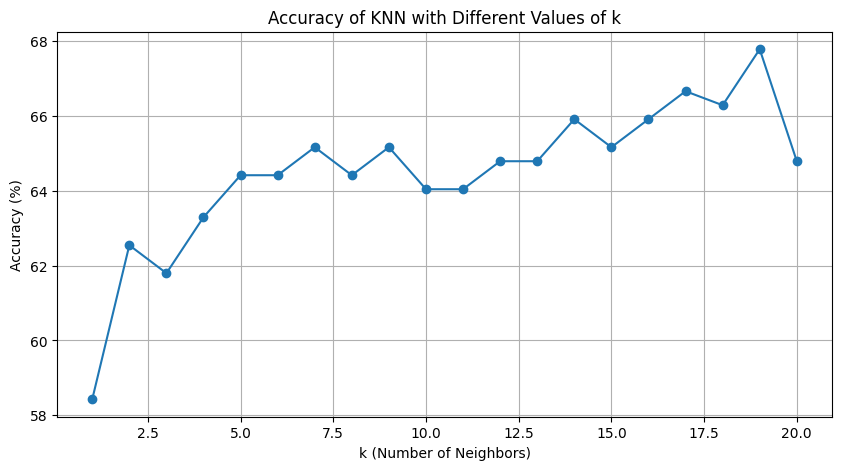

Experiment completed. Check the plot for the accuracy trend.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have these functions already defined:
# - knn_predict_single
# - knn_predict
# - compute_accuracy

# Function to test KNN on different values of k and plot the accuracies
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.

    Arguments:
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    X_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}
    for k in k_values:
        # Make predictions using the current value of k
        predictions = knn_predict(X_test, X_train, y_train, k=k)

        # Compute the accuracy
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy

        print(f"Accuracy for k={k}: {accuracy:.2f}%")

    # Plot the accuracies
    plt.figure(figsize=(10, 5))
    plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()

    return accuracies

# -------------------------------
# Test code for the experiment
# -------------------------------

# Define the range of k values to experiment with
k_values = range(1, 21)  # You can adjust this range as needed

# Run the experiment
try:
    accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")


In [1]:

# Problem 1:

# Import necessary libraries
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/Dataset-20251211T043131Z-3-001/Dataset/diabetes_.csv")

print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset info:")
print(data.info())

print("\nSummary statistics:")
print(data.describe())

print("\nMissing values check:")
print(data.isnull().sum())

# Some features have 0 as missing values, we replace 0 with NaN
columns_with_zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zero_as_missing] = data[columns_with_zero_as_missing].replace(0, np.nan)

# Impute missing values with column mean
for col in columns_with_zero_as_missing:
    data[col].fillna(data[col].mean(), inplace=True)

print("\nMissing values after imputation:")
print(data.isnull().sum())

X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

# Train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

print("\nShapes after train-test split:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

#Implement KNN from Scratch
# Euclidean distance function
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have same dimensions")
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Predict single query
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_labels = y_train[sorted_indices[:k]]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

# Predict all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

# Compute accuracy
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100


# Evaluate KNN

k = 3  # Number of neighbors
predictions = knn_predict(X_test, X_train, y_train, k=k)
accuracy = compute_accuracy(y_test, predictions)
print(f"\nKNN Accuracy on diabetes dataset (k={k}): {accuracy:.2f}%")


First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null  

/tmp/ipython-input-3457817883.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)



KNN Accuracy on diabetes dataset (k=3): 70.00%


In [2]:

# Problem 2:
import numpy as np
import pandas as pd

# (Reusing same KNN functions from Problem 1)

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_labels = y_train[sorted_indices[:k]]
    return np.bincount(nearest_labels).argmax()

def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split = int(len(X) * test_size)
    test_idx = indices[:split]
    train_idx = indices[split:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

data = pd.read_csv("/content/drive/MyDrive/Dataset-20251211T043131Z-3-001/Dataset/diabetes_.csv")

columns_with_zero_as_missing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[columns_with_zero_as_missing] = data[columns_with_zero_as_missing].replace(0, np.nan)
for col in columns_with_zero_as_missing:
    data[col].fillna(data[col].mean(), inplace=True)

X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

pred_original = knn_predict(X_test, X_train, y_train, k=3)
accuracy_original = compute_accuracy(y_test, pred_original)

print(f"Accuracy on Original (Unscaled) Data: {accuracy_original:.2f}%")

def min_max_scale(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_min) / (X_max - X_min)

X_scaled = min_max_scale(X)

# Split again (must match original logic)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y, test_size=0.3)

pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
accuracy_scaled = compute_accuracy(y_test_s, pred_scaled)

print(f"Accuracy on Scaled Data: {accuracy_scaled:.2f}%")

print("\n------ COMPARATIVE ANALYSIS ------")
print(f"Original Accuracy: {accuracy_original:.2f}%")
print(f"Scaled Accuracy:   {accuracy_scaled:.2f}%")

if accuracy_scaled > accuracy_original:
    print("\nScaling improved KNN performance because:")
    print("- KNN uses Euclidean distance, which is sensitive to different feature scales.")
    print("- Scaling brings all features to the same range so no feature dominates.")
else:
    print("\nScaling did not improve much because:")
    print("- Dataset features might already be in similar ranges.")


/tmp/ipython-input-2084283149.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


Accuracy on Original (Unscaled) Data: 70.00%
Accuracy on Scaled Data: 71.30%

------ COMPARATIVE ANALYSIS ------
Original Accuracy: 70.00%
Scaled Accuracy:   71.30%

Scaling improved KNN performance because:
- KNN uses Euclidean distance, which is sensitive to different feature scales.
- Scaling brings all features to the same range so no feature dominates.


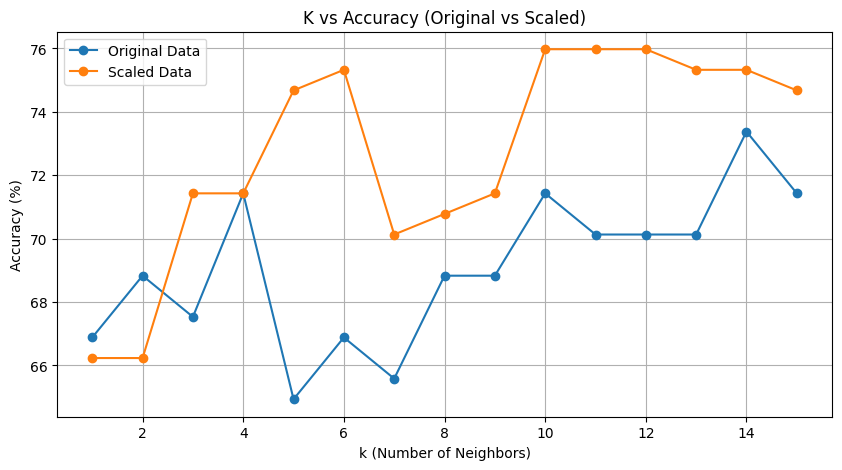

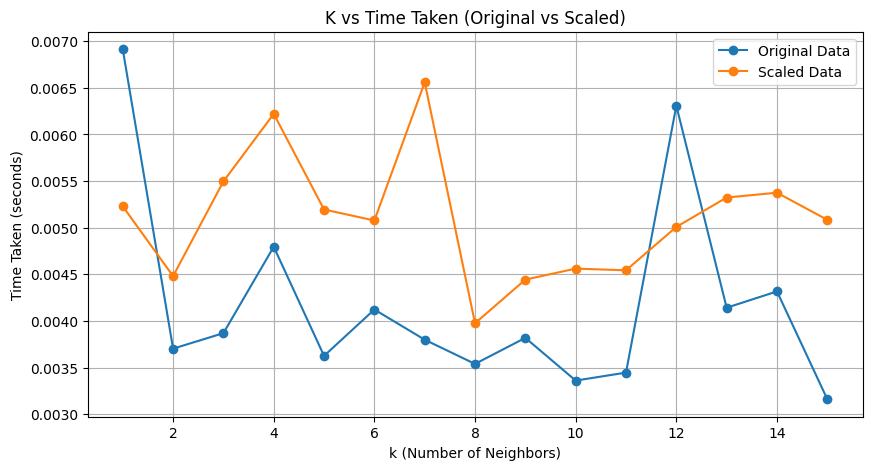

=== ACCURACY RESULTS ===
k = 1: Original = 66.88%, Scaled = 66.23%
k = 2: Original = 68.83%, Scaled = 66.23%
k = 3: Original = 67.53%, Scaled = 71.43%
k = 4: Original = 71.43%, Scaled = 71.43%
k = 5: Original = 64.94%, Scaled = 74.68%
k = 6: Original = 66.88%, Scaled = 75.32%
k = 7: Original = 65.58%, Scaled = 70.13%
k = 8: Original = 68.83%, Scaled = 70.78%
k = 9: Original = 68.83%, Scaled = 71.43%
k = 10: Original = 71.43%, Scaled = 75.97%
k = 11: Original = 70.13%, Scaled = 75.97%
k = 12: Original = 70.13%, Scaled = 75.97%
k = 13: Original = 70.13%, Scaled = 75.32%
k = 14: Original = 73.38%, Scaled = 75.32%
k = 15: Original = 71.43%, Scaled = 74.68%

=== TIME RESULTS ===
k = 1: Original = 0.00691s, Scaled = 0.00523s
k = 2: Original = 0.00370s, Scaled = 0.00448s
k = 3: Original = 0.00387s, Scaled = 0.00550s
k = 4: Original = 0.00480s, Scaled = 0.00622s
k = 5: Original = 0.00363s, Scaled = 0.00520s
k = 6: Original = 0.00412s, Scaled = 0.00508s
k = 7: Original = 0.00380s, Scaled = 0.00

In [3]:
import numpy as np
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Load or assume X, y exist


# Example:
# X, y = load_iris(return_X_y=True)

# Split data (same split for fairness)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def compute_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return (correct / total) * 100
# Experimentation for k = 1 to 15

k_values = range(1, 16)

accuracies_original = []
accuracies_scaled = []

times_original = []
times_scaled = []

for k in k_values:

    # ORIGINAL DATA
    knn = KNeighborsClassifier(n_neighbors=k)

    start_time = time.time()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    end_time = time.time()

    acc_orig = compute_accuracy(y_test, y_pred)
    accuracies_original.append(acc_orig)
    times_original.append(end_time - start_time)

    # SCALED DATA
    knn_scaled = KNeighborsClassifier(n_neighbors=k)

    start_time = time.time()
    knn_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = knn_scaled.predict(X_test_scaled)
    end_time = time.time()

    acc_scaled = compute_accuracy(y_test, y_pred_scaled)
    accuracies_scaled.append(acc_scaled)
    times_scaled.append(end_time - start_time)


# Accuracy vs k
plt.figure(figsize=(10,5))
plt.plot(k_values, accuracies_original, marker='o', label='Original Data')
plt.plot(k_values, accuracies_scaled, marker='o', label='Scaled Data')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("K vs Accuracy (Original vs Scaled)")
plt.grid(True)
plt.legend()
plt.show()

# Time vs k
plt.figure(figsize=(10,5))
plt.plot(k_values, times_original, marker='o', label='Original Data')
plt.plot(k_values, times_scaled, marker='o', label='Scaled Data')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.title("K vs Time Taken (Original vs Scaled)")
plt.grid(True)
plt.legend()
plt.show()

print("=== ACCURACY RESULTS ===")
for i, k in enumerate(k_values):
    print(f"k = {k}: Original = {accuracies_original[i]:.2f}%, Scaled = {accuracies_scaled[i]:.2f}%")

print("\n=== TIME RESULTS ===")
for i, k in enumerate(k_values):
    print(f"k = {k}: Original = {times_original[i]:.5f}s, Scaled = {times_scaled[i]:.5f}s")
